In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('Fake.csv')

In [3]:
df.head()

,text,label
0,Government launches new digital payment scheme,1
1,Scientists discover water on Mars,1
2,"Aliens visited Earth last night, claims unknow...",0
3,Celebrity adopts a baby from Africa,1
4,India wins the cricket world cup 2023,1


In [4]:
df.shape

(10, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10 non-null     object
 1   label   10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 292.0+ bytes


In [6]:
df.isnull().sum()

,0
text,0
label,0


In [7]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


<Axes: >

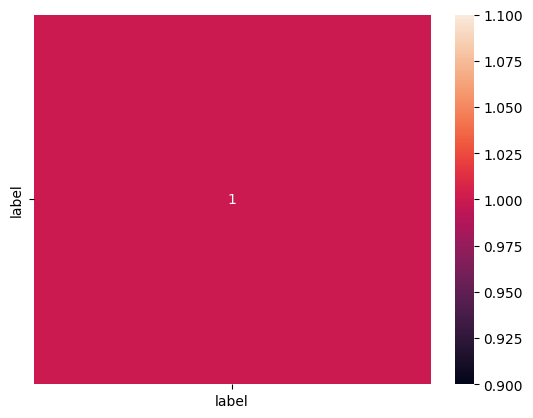

In [8]:
sns.heatmap(df.corr(numeric_only=True),annot = True)

<Axes: xlabel='label', ylabel='Count'>

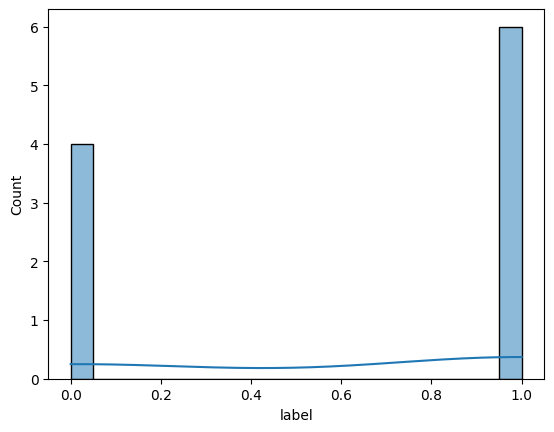

In [9]:
sns.histplot(df['label'],bins = 20,kde = True)

(array([4., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 6.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

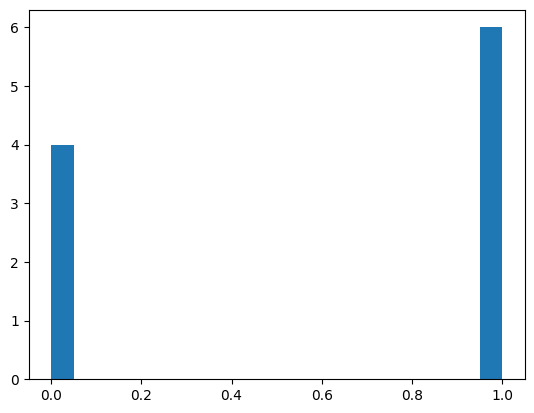

In [10]:
plt.hist(df['label'],bins = 20)

In [11]:
df.describe()

,label
count,10.000000
mean,0.600000
std,0.516398
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [12]:

# data cleaning
import string

def clean_text(text):
    text = text.lower()
    text = "".join([c for c in text if c not in string.punctuation])
    return text

df["clean_text"] = df["text"].apply(clean_text)
df.head()


,text,label,clean_text
0,Government launches new digital payment scheme,1,government launches new digital payment scheme
1,Scientists discover water on Mars,1,scientists discover water on mars
2,"Aliens visited Earth last night, claims unknow...",0,aliens visited earth last night claims unknown...
3,Celebrity adopts a baby from Africa,1,celebrity adopts a baby from africa
4,India wins the cricket world cup 2023,1,india wins the cricket world cup 2023


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df["clean_text"])
y = df["label"]


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
model= LinearRegression()

In [19]:
model.fit(X_train,y_train)

LinearRegression()

In [20]:
from sklearn.svm import SVC


In [21]:
svm_model = SVC(kernel="linear", probability=True)
svm_model.fit(X_train, y_train)


SVC(kernel='linear', probability=True)

In [22]:
svm_pred = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))


SVM Accuracy: 0.0


In [23]:
print(y_test[:10])
print(model.predict(X_test)[:10])


8    1
1    1
Name: label, dtype: int64
[0.49897326 0.49897326]


In [24]:
import pickle

In [25]:
pickle.dump(model, open("model.pkl", "wb"))

In [26]:
pickle.dump(svm_model, open("svm_model.pkl", "wb"))


In [27]:
pickle.dump(vectorizer, open("vectorizer.pkl", "wb"))